# Aula: Cálculo Simples do Volume Molar e Pressão De Saturação a partir de uma Equação De Estado Cúbica
**Objetivo: calcular e desenhar a curva de pressão de saturação...**
* Para uma substância pura (e.g, hexano)
* Usando uma *equação de estado* cúbica (e.g, van der Waals)

## Formulação matemática do problema

* Desenha um gráfico ${P}$ contra ${T}$
* Em que para cada ${T}$,
* Para uma substância pura pré definida 
  * A ${P}$ correspondente é a **pressão** de equilíbrio líquido-vapor dessa substância naquela **temperatura**: ${P}^\mathrm{ sat}({T})$
  
  > **Análise de consistência do problema proposto: análise de graus de liberdade de acordo com a regra das fases de Gibbs**
  >* $\nu^{Gibbs} = {C}-{F}+2$
  >* ...........  $= 1-2+2$
  >* ...........  $= 1$
  >
  >**Conclusão:** Um único grau de liberdade: é possível rerpesentar ${P}^\mathrm{ sat}$ como função de uma variável, no caso, ${T}$, o problema proposto é um problema *bem colocado*.

# Pressão de saturação
  * ${P}^{\mathrm{ sat}}$ é a pressão que resolve ${f}^{\mathrm{ L}}({T},{P}) = {f}^{\mathrm { V}}({T},{P})$.
  * ${f}$ é a fugacidade, que para condição de líquido, é dada por ${f}^\mathrm{ L}({T},{P})=\phi({T},\bar{V}^\mathrm{ L}) \times {P}$
  * e, para condição de vapor, é dada por ${f}^\mathrm{ V}$, analogamente.
  * E $\bar{V}^{\mathrm{ L}}$ e $\bar{V}^\mathrm{ V}$ são o volume molar da substância em condição de líquido e de vapor, respectivamente, dados a partir da análise das raízes da solução da equação estado para ${V}$ em função de ${T}$ e ${P}$:
  * $\bar{V}$ são os volumes que resolvem ${P}\bar{V}^3−({P}{b}+{R}{T})\bar{V}^2+{a}\bar{V}−{a}{b}={0}$
    * Se 3 raízes no intervalo Real $\left( b, \infty \right)$
      * $\bar{V}^\mathrm{ L}$ é a menor e $\bar{V}^\mathrm{ V}$ é a maior delas.
    * Se não
      * Não há solução para ${P}^\mathrm{ sat}$ na temperatura em questão.

# A equação de estado
  * A equação de estado é, em sua forma explícita-em-pressão: ${P}=\frac{{R}{T}}{{\bar{V}}-{b}}-\frac{{a}}{{\bar{V}}^2}$
  
  * Em que$a$ e $b$ são parâmetros dependentes da substância, dados por
    * ${a}=\frac{27}{64}\frac{{{Tc}^2}{{R}^2}}{Pc}$
    * ${b}=\frac{{R}{Tc}}{{8}{Pc}}$
  * E ${R}$ é a constante dos gases, que em unidades SI possui o valor:
    * ${R} = 8.3144598$ $\mathrm{{J} {\mathrm{ mol}^{−1}} {\mathrm{ K}^{−1}}}$
    

# Propriedades conhecidas da substância
* A equação de estado de van der Waals depende de algumas poucas propriedades da substância para fazer sua previsão do comportamento delas em condição de líquido ou vapor
  * Temperatura do ponto crítico ${T_c}$
    * ${T_c}^{hexano}= 507.50$ $\mathrm{K}$
  * Pressão do ponto crítico ${P_c}$
    * ${P_c}^{hexano}= 3010000$ $\mathrm{Pa}$
  

# Implementação em python
* Fazer as rotinas mais básicas e com operação independente
* Testar cada uma delas
* Fazer as rotinas de nível mais alto, chamando as básicas (adaptar as básicas conforme necessário)

# Constantes

## Constante universal - define o sistema de unidades a ser usado no código

In [1]:
R = 8.3144598 #J.mol^−1.K^−1

## Constantes dependentes dos componentes no sistema:

In [2]:
Tc = 507.50
Pc = 3010000

## Funções de constantes são novas constantes:

In [3]:
# atribui um valor à constante a de acordo com a equação
a = 27/64*((Tc**2)*(R**2)/Pc)

In [4]:
# confere o valor calculado:
print(a)

2.4954993637433445


In [5]:
# analogamente para b
b = (R*Tc)/(8*Pc)
print(b)

0.0001752320742732558


# Função básica 1
* EoS em representação ${P}({T},\bar{V})$

In [6]:
# define função para calcular P para valores arbitrários de T e V
def function_P(T,V):
    # retorna valor da pressão de acordo com a equação:
    return R*T/(V-b) - a/(V**2)

In [7]:
# como teste, conferimos o resultado de pressão a T ambiente e V de gás ideal
print(function_P(298,0.0224))
# o resultado obtido é de 106510.64263262381 Pa, aproximadamente 1 atm, dentro da ordem de grandeza esperada para um hidrocarboneto leve

106510.64263262381


# Função básica 2: Calculadora de volume
* Calcular $\bar{V}$ que resolve ${P}{\bar{V}^3}−({P}{b}+{R}{T}){\bar{V}^2}+{a}\bar{V}−{a}{b}={0}$

** $1^a$ raiz real: método de Newton-Raphson:**

* ${Res}={c_3}\bar{V}^3+{c_2}\bar{V}^2+{c_1}\bar{V}+{c_0}$
* $\frac{\partial {Res}}{\partial {V}}=3{c_3}\bar{V}^2+2{c_2}\bar{V}+{c_1}$
* $\bar{V}_1^{[{k}+1]}=\bar{V}_1^{[{k}]}-\frac{Res}{ {\partial {Res}}/{\partial \bar{V}} }$

** Estimativa inicial: gás ideal:**

* $\bar{V}_1^{[0]} = \frac{{R}{T}}{P}$

**Mais duas raízes: Método de redução de ordem de polinômio:**
* ${c_3}\bar{V}^3+{c_2}\bar{V}^2+{c_1}\bar{V}+c_0=(\bar{V}-\bar{V}_1)({c_4}\bar{V}^2+{c_5}\bar{V}+{c_6})$
* ...............................................$={c_4}\bar{V}^3+({c_5}-{c_4}\bar{V}_1)\bar{V}^2+({c_6}-{c_5}\bar{V}_1)\bar{V}+(-{c_6}\bar{V}_1)$
* ${c_4} = {c_3}$
* ${c_5} = {c_2}+{c_4}\bar{V}_1$
* ${c_6} = {c_1}+{c_5}\bar{V}_1$

**Soluçãos das raizes de uma parábola:**
* $\bar{V}_2 = \frac{-{c_5}+\sqrt{{c_5}^2-4{c_4}{c_6}}}{2{c_4}}$
* $\bar{V}_3 = \frac{-{c_5}-\sqrt{{c_5}^2-4{c_4}{c_6}}}{2{c_4}}$

## Importar o pacote NumPy para usar as funções *raiz quadrada*, *exponencial*, *logaritmo*, etc...

In [8]:
import numpy as np

Definição da função calculadore de volume a partir de um par de valores T, P.

In [9]:
def function_V(T,P):
    
    #definição dos termos da forma polinomial da equação de estado
    c3 = P #coeficiente para v^3
    c2 = -(P*b+R*T) #coeficiente para v^2
    c1 = a  #ceficiente para v^1
    c0 = -a*b  #coeficiente para v^0
    
    #variáveis de método numérico para busca da 1a raiz
    RES=1 #resíduo do método
    TOL=1e-9 #tolerância do resíduo
    MAX=1000 #número máximo de iterações aceitável
    
    V1=R*T/P #estimativa inicial

    i=0 #contador de iteraçõesm iniciado como zero, incrementado em 1 após cada iteração concluída
    while(RES>TOL and i<MAX): #Em caso de problema em que o método iterativo crie um loop infinito
                              #interromper o Kernel: Botão "STOP", ou Barra de ferramentas > Kernel > Interrupt
        V1 -= (c3*V1**3+c2*V1**2+c1*V1+c0)/(3*c3*V1**2+2*c2*V1+c1) #atualização do valor de V por subtração do termo f/df a cada iteração
        RES=np.abs(c3*V1**3+c2*V1**2+c1*V1+c0) #cálculo do resíduo com o novo valor de V
        i += 1 #incremento no contador de iterações

    # cálculo das demais raízes: V2 e V3
    
    #definição dos termos da forma polinomial da equação de estado reduzida ( dada uma de suas raízes )
    c4=c3
    c5=c2+c4*V1
    c6=c1+c5*V1
    
    #resolução analítica de parábola
    delta=(c5**2)-(4*c4*c6)
    
    if delta < 0: #caso o termo "delta" seja negativo, V2 e V3 são raízes complexas, logo só existe uma raiz real, o que fazer?
        V_only = V1 #temos uma única raiz real
        return [V_only] #retornamos ela como resultado da calculadora de volume
        #obs: retorna o valor de volume envolta em colchetes,
        #i.e. na forma de uma lista de um elemento,
        #para q o codigo externo q faça uso dessa função possa
        #descobrir o numero de raízes a partir da função `len`, veja no teste a seguir:`
    
    else: #caso contrário, existem mais duas raízes reais, a seguir:
        V2=(-c5 + np.sqrt(delta))/(2*c4)
        V3=(-c5 - np.sqrt(delta))/(2*c4)

    # além do caso de raízes V2 e V3 complexas, é preciso eliminar valores menores q o parâmetro b da equação de estado, pois não representam soluções físicamente coerentes para o volume 
        # filtrar apenas V no intervalo (b,infnty)
        nroots=0
        if ((V1>b) and (V2>b) and (V3>b)): #sendo as tres fisicamente coerentes
            #usando a função `sort` podemos criar uma lista que, nos casos de três raízes físicas, as apresenta em ordem crescente,
            #logo, V_líquida, V_intermediária, V_vapor
            [VL,Vi,VV]=np.sort([V1,V2,V3])
            return [VL,Vi,VV]
        else:
            V_only = np.max([V1,V2,V3]) #temos uma única raiz no intervalo (b, infinito)
            return [V_only] #retornamos ela como resultado da calculadora de volume


In [10]:
# testar o resultado da função

test_T=298 #vamos testar quais os volumes calculados a T ambiente
test_P=1e5 #e P atmosférica

# atribui a variável de resposta `ans_V` o resultado do calculo de V nas condições (test_T,test_P)
ans_V = function_V(test_T,test_P)

# a função `len` retorna o tamanh da lista de volumes, i.e. o número de soluções de volume encontradas
print(len(ans_V), " raiz(es):")

#usando o deferenciador por índice: lista[indice], começando pelo zero, temos acesso ao valor de cada volume

if (len(ans_V) == 3 ):
    print("liquid volume = ", ans_V[0])
    print("vapor volume = ", ans_V[2])
else:
    print("unique volume = ", ans_V)
    
test_T=600 #vamos testar quais os volumes calculados a T maor q Tc
test_P=1e5 #e P atmosférica

ans_V = function_V(test_T,test_P)

print(len(ans_V), " raiz(es):")

if (len(ans_V) == 3 ):
    print("liquid volume = ", ans_V[0])
    print("vapor volume = ", ans_V[2])
else:
    print("unique volume = ", ans_V[0])

3  raiz(es):
liquid volume =  0.000225711777704
vapor volume =  0.0239165476647
1  raiz(es):
unique volume =  0.04956024274063786


# Função básica 3
* energia de Gibbs residual
$${\bar{G}^\mathrm{ Res}} = {P}\bar{V}-{R}{T}-\frac{a}{\bar{V}} -{R}{T} \times ln \left (\frac{{P}(\bar{V}-{b})}{{R}{T}} \right )$$

In [11]:
#define função para energia de Gibbs residual de acordo com a equação
def Residual_G(T,P,V):
    return (P*V)-(R*T)-(a/V)-T*(R*np.log(P*(V-b)/(R*T)))

In [12]:
test_T=100
test_P=100
Vs=function_V(test_T,test_P)
print(Vs)
print(Residual_G(test_T,test_P,Vs[0]))
print(Residual_G(test_T,test_P,Vs[1]))
print(Residual_G(test_T,test_P,Vs[2]))

[0.00018686631450534036, 0.0028154881548850706, 8.3116326776048819]
-2978.36956768
4979.68247208
-0.282664348816


# Método numérico
* Cálculo de pressão de saturação de equilíbio líquido vapor de substancia pura baseado no algoritmo apresentado por [Sandler, 1999][Sandler, 3rd, 1999]
[Sandler, 3rd, 1999]: https://books.google.com/books?isbn=0471182109

**Substituição sucessiva** 

$ P^{[k+1]}= \left[ P\frac{\phi^{\mathrm{L}}(P)}{\phi^{\mathrm{V}}(P)} \right]^{[k]}$

In [13]:
def calc_P_sat(T,iguess_P):
    
    #variáveis de método numérico
    RES=1
    TOL=1e-9
    MAX=1000

    #estimativa inicial
    P=iguess_P
    
    #contagem de iterações
    i=0
    while(RES>TOL and i<MAX): #Kernel > Interrupt (console > Ctrl+C)
        ans_V=function_V(T,P)
        
        if (len(ans_V) == 1): #caso so tenha sido encontrada uma raiz, não será possível calcular P_sat para essa temperatura por esse método
            return #return sem variável pois não há solução, o código q chama essa função precisa saber lidar com esse resultado excepcional!
        [V_L,_,V_V] = ans_V
        phi_L=np.exp(Residual_G(T,P,V_L)/(R*T))
        phi_V=np.exp(Residual_G(T,P,V_V)/(R*T))
        P=P*(phi_L/phi_V)
        RES=np.abs(phi_L/phi_V-1.)
        i=i+1
    return P

In [14]:
#testes da função calc_P_sat

test_P = 100

test_T = 100

Psat=calc_P_sat(test_T,test_P)
print("Psat = ",Psat)

test_T = 125


Psat=calc_P_sat(test_T,test_P)
print("Psat = ",Psat)

test_T = 150


Psat=calc_P_sat(test_T,test_P)
print("Psat = ",Psat)

test_T = 200

Psat=calc_P_sat(test_T,test_P)
print("Psat = ",Psat)

Psat =  2.7815306137
Psat =  84.091792973
Psat =  811.77760325
Psat =  13738.2253961


# Grid, Calc and Plot
* Definiremos um grid de valores de temperatura sobre o qual queremos calcular a pressão de saturação
* Realizaremos o cálculo para cada ponto do grid, recursivamente
* Por fim, utilizaremos ferramentas gráficas do matplotlib para desenhar o gráfico de P_sat x T


In [15]:
#grid feito usando a função linspace, gera pontos igualmente espaçados em escala linear. No caso: 100 pontos, entre 100 e Tc, inclusive.
grid_T=np.linspace(100,Tc,100)
grid_P=np.zeros(100)

#estimativa inicial para o primeiro cálculo
guess_P=100

#efetua primeiro calculo
grid_P[0]=calc_P_sat(grid_T[0],guess_P) #primeiro ponto

#efetua demais cálculos
for i in range(1,100): #demais pontos
    grid_P[i]=calc_P_sat(grid_T[i],grid_P[i-1])
    #print(grid_P[i]) #habilitar essa linha - removendo o símbolo de comentário -- # -- - faz com que os resultados de cada iteração sejam exibidos na seção de impressão da célula

In [16]:
#imprimindo apenas alguns dos resultados
print(grid_P[0]) #primeiro ponto
print(grid_P[9]) #décimo ponto
print(grid_P[99])#último ponto: o calculo de psat não convergiu,
#o `return` devido ao sem variável o valor da pressão na lista  grid_P mostra `nan`, que significa "not a number"

2.7815306137
278.173786459
nan


In [17]:
#comparação com correlação de Antoine:
def PAntoine_nist(T): #http://webbook.nist.gov/cgi/cbook.cgi?ID=C110543&Mask=4
    if T < 177.70:
        return 0 #no correlation available
    elif T <= 264.93:
        A=3.45604
        B=1044.038
        C=-53.893
        return (10**( A - (B / (T + C)) )   )* 10**5
    elif T < 286.18:
        return 0 #no correlation available
    elif T<=342.69:
        A=4.00266
        B=1171.53
        C=-48.784
        return (10**( A - (B / (T + C)) )   )* 10**5
    else:
        return 0 #no correlation available
    
def PAntoine_ddbst(T): #http://ddbonline.ddbst.com/AntoineCalculation/AntoineCalculationCGI.exe
    A=7.01051
    B=1246.33
    C=232.988
    return (10**( A - (B / (T - 273 + C)) )   )* 101325/760.0

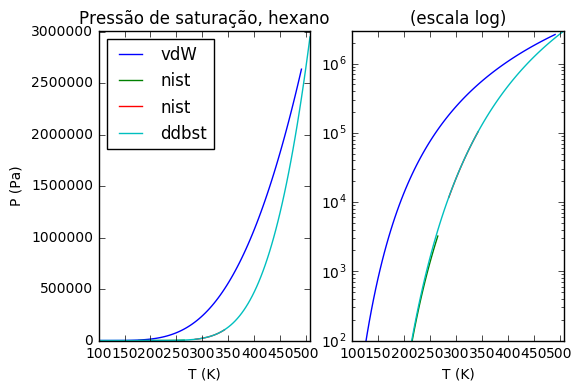

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

#ativar uma figura 1
plt.figure(1)

legend=[] #iniciador do objeto legenda

plt.subplot(121) #activate a subplot
plt.title('Pressão de saturação, hexano')

#o grafico P x T calculado

#filtrar not-a-number e zeros
grid_P_real = ~np.isnan(grid_P)
filtered_grid_T = grid_T[ np.where( grid_P_real ) ]
filtered_grid_P = grid_P[ np.where( grid_P_real ) ]

#traçar

plt.plot(filtered_grid_T,filtered_grid_P, label='vdW') #label é a etiqueta que será usada na legenda

#calcular correlações de Antoine

## nist
grid_TAntoine_nist_1 = np.linspace(177.7,264.93,100)
grid_PAntoine_nist_1 = np.array([ PAntoine_nist(grid_TAntoine_nist_1[i]) for i in range(100) ])

grid_TAntoine_nist_2 = np.linspace(286.18,342.69,100)
grid_PAntoine_nist_2 = np.array([ PAntoine_nist(grid_TAntoine_nist_2[i]) for i in range(100) ])

# traçar
plt.plot(grid_TAntoine_nist_1,grid_PAntoine_nist_1, label='nist')
plt.plot(grid_TAntoine_nist_2,grid_PAntoine_nist_2, label='nist')

## ddbst
grid_TAntoine_ddbst = np.linspace(100,Tc,100)
grid_PAntoine_ddbst = np.array([ PAntoine_ddbst(grid_TAntoine_ddbst[i]) for i in range(100) ])

# traçar

plt.plot(grid_TAntoine_ddbst,grid_PAntoine_ddbst, label='ddbst')

# opções adicionais do gráfico

## limites no eixo x e y
plt.xlabel('T (K)')
plt.ylabel('P (Pa)')
plt.xlim([100,Tc])
plt.ylim([0,Pc])

plt.legend(loc=0) #exibe legenda na localização "0", ver no gráfico:

#ativar uma segunda figura
plt.figure(1)
plt.subplot(122) #activate a subplot

plt.title('(escala log)')

# mesmos plots em escala log
plt.semilogy(filtered_grid_T,filtered_grid_P)
plt.semilogy(grid_TAntoine_nist_1,grid_PAntoine_nist_1)
plt.semilogy(grid_TAntoine_nist_2,grid_PAntoine_nist_2)
plt.semilogy(grid_TAntoine_ddbst,grid_PAntoine_ddbst)
plt.xlabel('T (K)')
plt.xlim([100,Tc])
plt.ylim([100,Pc])



plt.show()

## Conclusões
Nesta aula, uma equação de estado cúbica simples foi utilizada para calcular volume, energia de Gibbs residual, coeficientes de fugacidade e a pressão de saturação de um fluido puro. Aqui, a pressão de saturação foi obtida buscando uma solução numérica para a pressão que leva a energia de Gibbs residual igual entre as duas fases. Para tal, essa aula introduziu conceitos de cálculo de equilíbrio de fases e formas simples de implementar os cálculos propostos na linguagem python, utilizando funções matemáticas e estruturas do pacote numpy. Após estudar essa aula, o aluno deve ser capaz de resolver problemas simples em equilibrio de fases e entender os pontos chave cruciais dos métodos numéricos envolvidos.

# Referências externas
Notas de aula de Abreu C. R. A. (UFRJ > EQ > TPQB), não disponíveis online atualmente.

# Créditos
* Baseado nas notas de aula de *Termodinâmica Aplicada* de Abreu C. R. A. (UFRJ > EQ > TPQB)
* Implementado em ipynb com python 3.5 por Iuri Soter Viana Segtovich
* Revisado por Fernando de Azevedo Medeiros